In [70]:
# %pip install scikit-learn
# %pip install pandas

In [ ]:
import pandas as pd

df = pd.read_csv('dataset/raw_data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [73]:
# Get number of NULLs in dataset:
print("Number of NULLs in dataset:", df.isnull().values.sum())

Number of NULLs in dataset: 0


No NULLs! :)

Categorize features into quantitative (numerical) and qualitative (string):

In [ ]:
quantitative_features = []
qualitative_features = []

for i in list(df.columns):
    if type(df[i][0]) == str:
        qualitative_features.append(i)
    else:
        quantitative_features.append(i)

print("Quantitative Features: ", quantitative_features)
print("Qualitative Features: ", qualitative_features)

Quantitative Features:  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
Qualitative Features:  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


Transform Qualitative Features into numerical values:

In [75]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [76]:
print(qualitative_features)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


Plot feature distribution to identify features which are naturally normally distributed or 

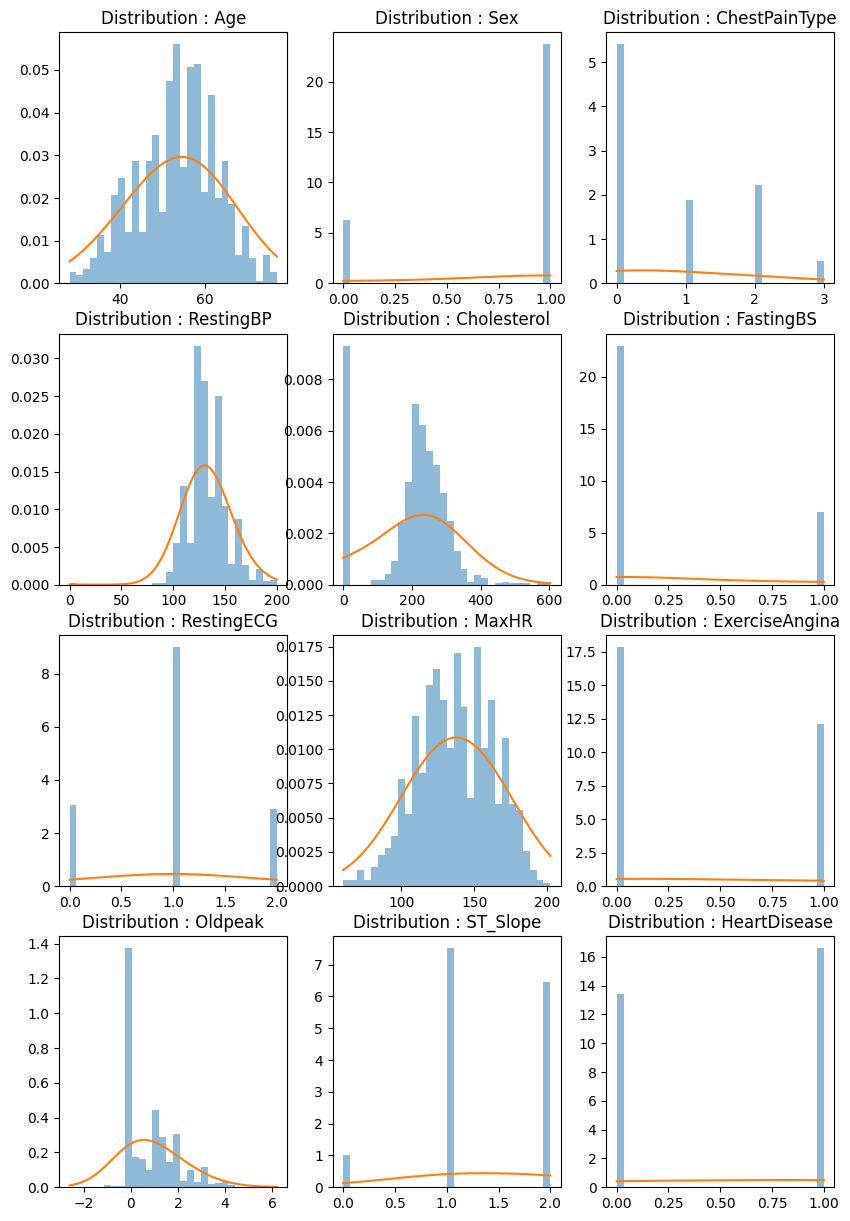

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(10,15))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    data = df[col]
    ax[i].hist(data, bins=30, density=True, alpha=0.5)

    if len(data) > 1:
        kde = gaussian_kde(data, bw_method=1)
        x_range = np.linspace(data.min(), data.max(), 100)
        ax[i].plot(x_range, kde(x_range))

    ax[i].set_title('Distribution : ' + col)

plt.show()


Since all features are primarily normally distributed, no normalization is required.

Standardize features which are not between 0 and 1. Ensures feature contribute to training equally, preventing those with larger scales from dominating.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['Age'] = scaler.fit_transform(df[['Age']])
df['ChestPainType'] = scaler.fit_transform(df[['ChestPainType']])
df['RestingBP'] = scaler.fit_transform(df[['RestingBP']])
df['Oldpeak'] = scaler.fit_transform(df[['Oldpeak']])
df['Cholesterol'] = scaler.fit_transform(df[['Cholesterol']])
df['MaxHR'] = scaler.fit_transform(df[['MaxHR']])
df['RestingECG'] = scaler.fit_transform(df[['RestingECG']])
df['ST_Slope'] = scaler.fit_transform(df[['ST_Slope']])

df.head()
print("Min, max, mean values:")

for col in df.columns:
    print(f"{col}: {df[col].min()}, {df[col].max()} {df[col].mean():.2f}")


Min, max, mean values:
Age: 0.0, 1.0 0.52
Sex: 0, 1 0.79
ChestPainType: 0.0, 1.0 0.26
RestingBP: 0.0, 1.0 0.66
Cholesterol: 0.0, 1.0 0.33
FastingBS: 0, 1 0.23
RestingECG: 0.0, 1.0 0.49
MaxHR: 0.0, 1.0 0.54
ExerciseAngina: 0, 1 0.40
Oldpeak: 0.0, 1.0 0.40
ST_Slope: 0.0, 1.0 0.68
HeartDisease: 0, 1 0.55


In [ ]:
df.to_csv('dataset/refined_data.csv', index=False)